In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile
from mpl_toolkits.mplot3d import Axes3D
import glob
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

# Loading the Data and Standardizing the Resolutions

In [3]:
# load the tar file
tar_path = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00.tar'
tar_path


'/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00.tar'

In [4]:
with tarfile.open(tar_path, 'r') as tar:
    # Get a list of all members in the archive
    members = tar.getmembers()

    # Slice the list to get the first 100 members
    first_100_members = members[:101]

    # Extract the first 100 members to current directory
    tar.extractall(members=first_100_members)


In [5]:
jpg_files = glob.glob(
    '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/*.jpg')


In [6]:
len(jpg_files)


100

In [7]:
for filename in jpg_files:
    with Image.open(filename) as img:
        print(f"Image resolution for {filename}: {img.size}")


Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/D3MJTY12U7.jpg: (1024, 1024)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/UZIJ149HLU.jpg: (1024, 1024)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/IGSU2ZYVXE.jpg: (1024, 1024)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/L9ZLK0HXP5.jpg: (1024, 1024)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/ZTGFU7VQFK.jpg: (1024, 1024)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/9V5TCCADSO.jpg: (1024, 1024)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/1TKBTEGOB5.jpg: (1024, 1024)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/1MACF8SRZN.jpg: (1024, 1024)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-ma

```
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/UZIJ149HLU.jpg: (1024, 1024)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/IGSU2ZYVXE.jpg: (1024, 1024
```

In [8]:
jpg_files = glob.glob(
    '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/*.jpg')


In [9]:
# resize the images
for filename in jpg_files:
    with Image.open(filename) as img:
        # resize
        resized_img = img.resize((256, 256))

        resized_img.save(filename)

print("All images resized successfully!")


All images resized successfully!


In [10]:
for filename in jpg_files:
    with Image.open(filename) as img:
        print(f"Image resolution for {filename}: {img.size}")


Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/D3MJTY12U7.jpg: (256, 256)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/UZIJ149HLU.jpg: (256, 256)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/IGSU2ZYVXE.jpg: (256, 256)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/L9ZLK0HXP5.jpg: (256, 256)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/ZTGFU7VQFK.jpg: (256, 256)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/9V5TCCADSO.jpg: (256, 256)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/1TKBTEGOB5.jpg: (256, 256)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/1MACF8SRZN.jpg: (256, 256)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/4

```
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/D3MJTY12U7.jpg: (128, 128)
Image resolution for /Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/UZIJ149HLU.jpg: (128, 128)
```

In [11]:
# store these images in a list
fake_img_lst = []

for filename in jpg_files:
    with Image.open(filename) as img:
        fake_img_lst.append(img)

# check the length of the list
len(fake_img_lst)


100

In [12]:
true_face_path = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/Data/Train/*.png'
# read in the first 100 images
true_img_lst = []

for filename in glob.glob(true_face_path)[:100]:
    with Image.open(filename) as img:
        # convert to jpg
        img = img.convert('RGB')
        # resize the image
        # img = img.resize((128, 128))
        # resize to 256 x 256
        img = img.resize((256, 256))
        true_img_lst.append(img)

# check the length of the list
len(true_img_lst)


100

In [ ]:
# check the resolution of the images
for img in true_img_lst:
    print(f"Image resolution: {img.size}")


```
Image resolution: (128, 128)
```

In [14]:
assert true_img_lst[0].size == fake_img_lst[0].size

# check all the images have the same resolution
for img in true_img_lst:
    assert img.size == true_img_lst[0].size


# EDA (Data Exploration and Visualization)

In [15]:
import random


### True faces (visualize the random 30 images)

```

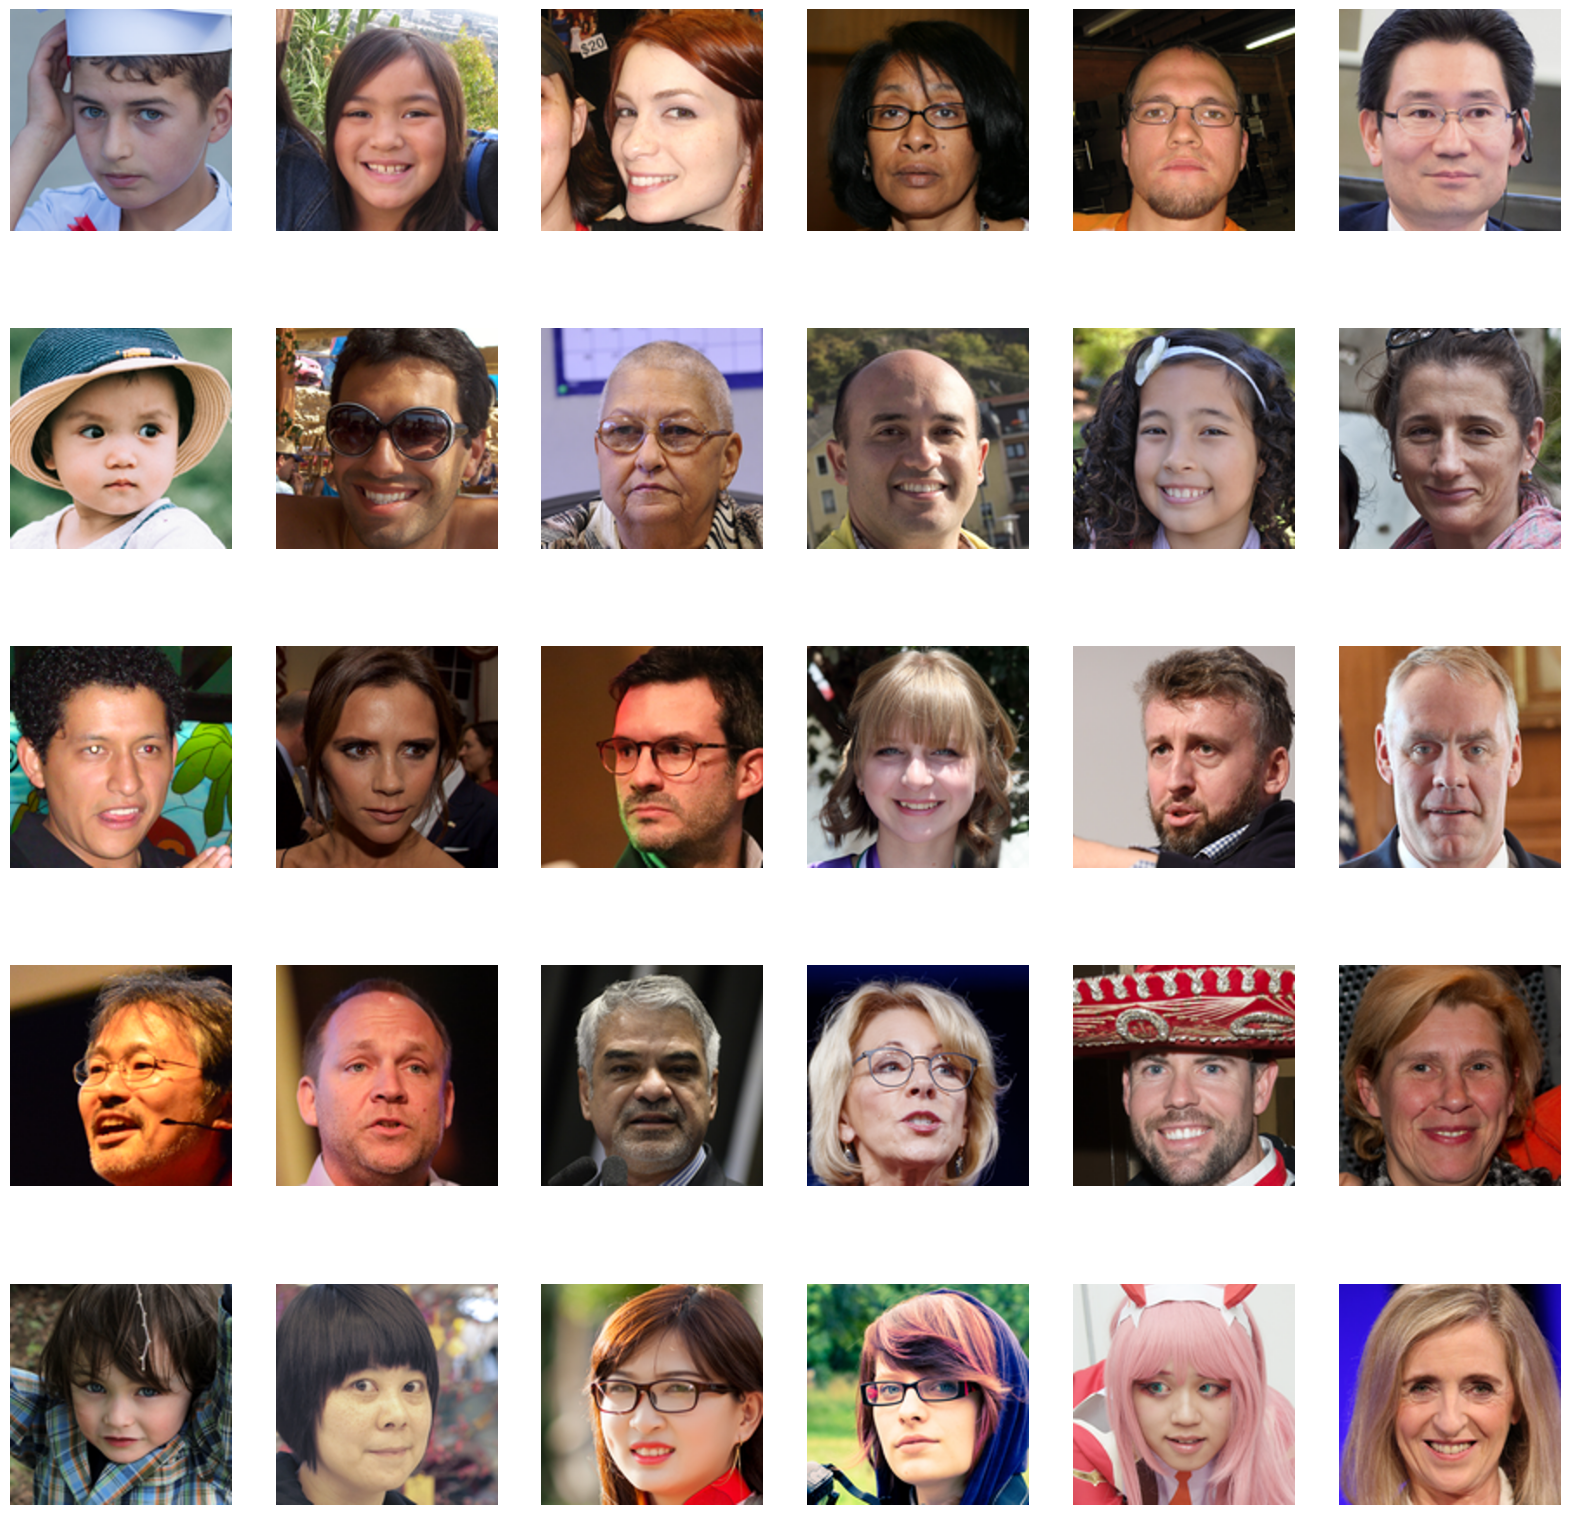

In [16]:
selected_files_true = random.sample(true_img_lst, 30)
# selected_files_true
# visualize the randomly selected images:30 for true images
fig, ax = plt.subplots(5, 6, figsize=(20, 20))

for i in range(5):
    for j in range(6):
        ax[i, j].imshow(selected_files_true[i*6 + j])
        ax[i, j].axis('off')

plt.show()


In [17]:
# get the type of the images
type(true_img_lst[0])


PIL.Image.Image

> Here is a sample of 30 true faces from the dataset. The race distribution is not even. There are more white faces than black faces and asian faces.

### False faces (visualize the random 30 images)


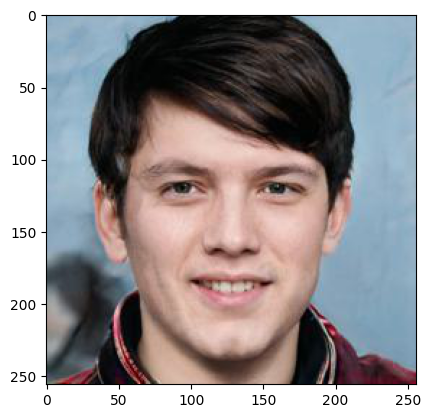

In [18]:
test_fake_path = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/1B4CRR0ERM.jpg'

jpeg_image = Image.open(test_fake_path)

plt.imshow(jpeg_image)
plt.show()


In [19]:
# get path from the folder
fake_img_path = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00/*.jpg'
# get all the path of the images
fake_img_path_lst = glob.glob(fake_img_path)
# get the first 100 images
fake_img_path_lst = fake_img_path_lst[:100]
# check the length of the list
len(fake_img_path_lst)


100

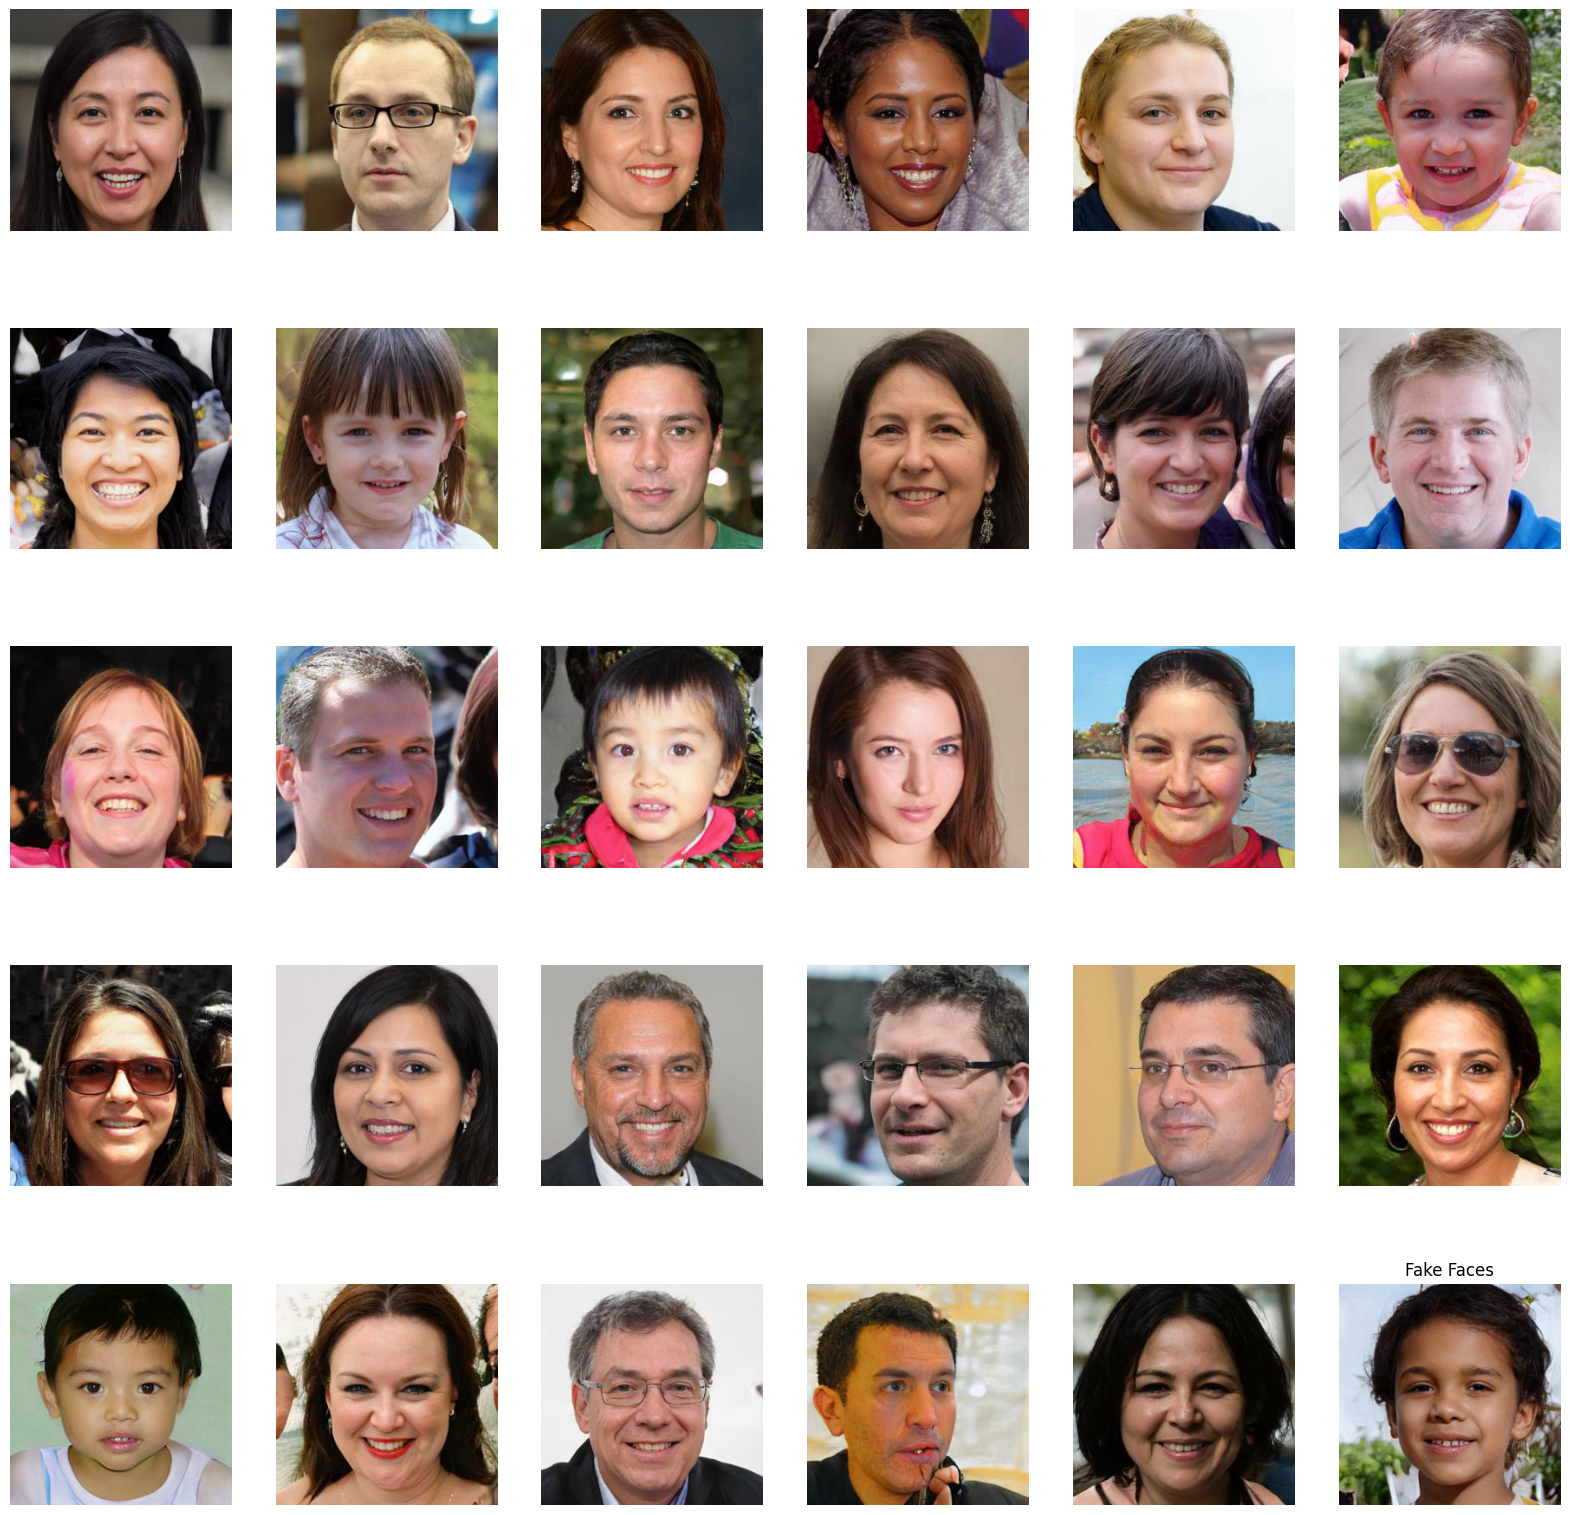

In [20]:
selected_fake_faces = random.sample(fake_img_path_lst, 30)
selected_fake_faces

# visualize the randomly selected images:30 for fake images
fig, ax = plt.subplots(5, 6, figsize=(20, 20))

for i in range(5):
    for j in range(6):
        ax[i, j].imshow(Image.open(selected_fake_faces[i*6 + j]))
        ax[i, j].axis('off')

plt.title('Fake Faces')
plt.show()


> By visually inspecting the images, we can see that the images are highly similar to the real faces. We are taking a random sampling of 30 each time. Thus it gives us a good idea of the data.

In [21]:
# import os
# from PIL import Image

# # Set the directory containing the PNG images
# png_dir = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_00'

# # Loop through all PNG files in the directory
# for filename in os.listdir(png_dir):
#     if filename.endswith('.png'):
#         # Open the PNG image using PIL
#         png_image = Image.open(os.path.join(png_dir, filename))

#         # Convert the PNG image to the RGB format
#         rgb_image = png_image.convert('RGB')

#         # Save the RGB image to a file
#         rgb_image.save(os.path.join(png_dir, filename.replace('.png', '_rgb.png')))


In [22]:
len(true_img_lst)


100

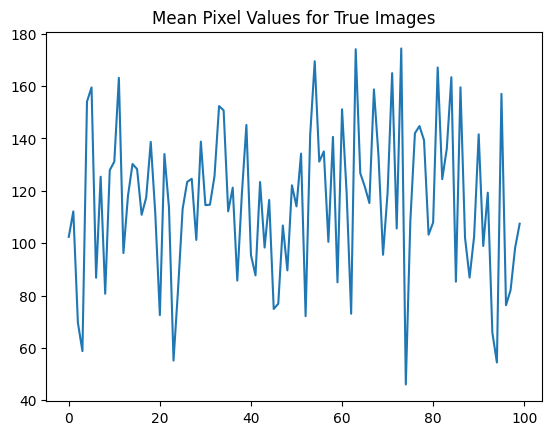

In [23]:
# get the mean pixel values for each image
mean_pixel_values = []

for img in true_img_lst:
    mean_pixel_values.append(np.mean(img))

# plot the mean pixel values
plt.plot(mean_pixel_values)
plt.title('Mean Pixel Values for True Images')
plt.show()


> True Faces 3D Scatter Plot (30 samples): 3 mean color channel: RGB

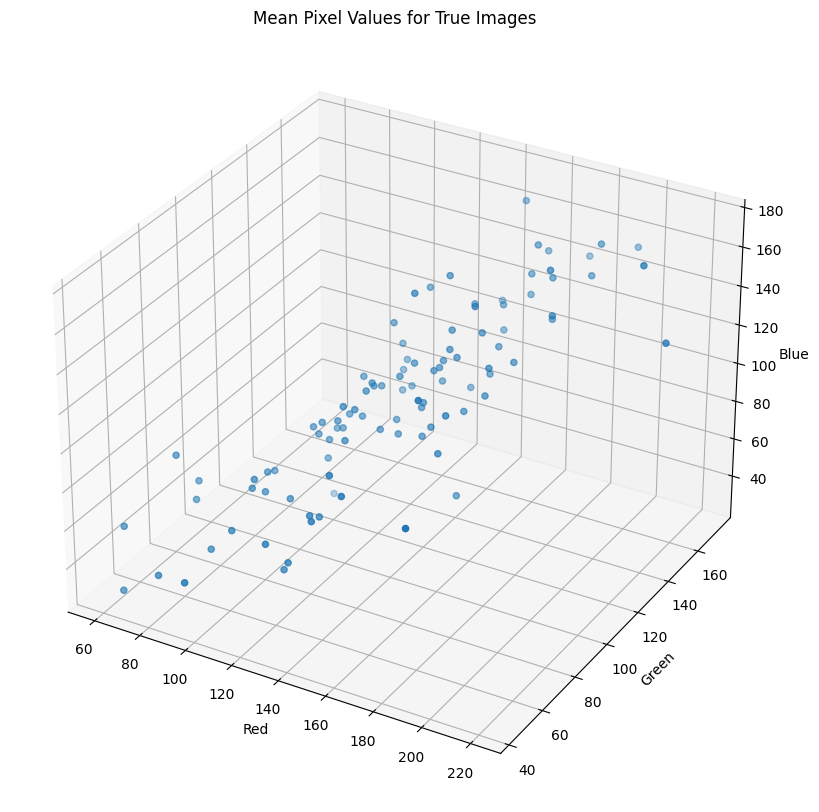

In [24]:
# get mean pixel values for real images in a 3 channel format in a 3D plot
mean_pixel_values = []

for img in true_img_lst:
    mean_pixel_values.append(np.mean(img, axis=(0, 1)))

mean_pixel_values = np.array(mean_pixel_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mean_pixel_values[:, 0],
           mean_pixel_values[:, 1], mean_pixel_values[:, 2])
plt.title('Mean Pixel Values for True Images')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
fig.set_size_inches(10, 10)
plt.show()


> Fake Faces RGB values

In [25]:
# get pixel value of the first image in the fake image list
Image.open(fake_img_path_lst[0])
# get the 3 channels pixel values of the image
r, g, b = Image.open(fake_img_path_lst[0]).split()
# Image.open(fake_img_path_lst[0]).split()
# np.mean(Image.open(fake_img_path_lst[0]))
# get the three channels of the image with numerical values
r_arr = np.array(r)
g_arr = np.array(g)
b_arr = np.array(b)
# get the mean pixel values for each channel
r_mean = np.mean(r_arr)
g_mean = np.mean(g_arr)
b_mean = np.mean(b_arr)


In [26]:
# Initialize empty arrays to hold pixel values for each channel
r_arr = np.array([])
g_arr = np.array([])
b_arr = np.array([])

# Loop over each image in the list of fake image paths
for img_path in fake_img_path_lst:
    # Open the image using the PIL Image class
    img = Image.open(img_path)
    # Split the image into its red, green, and blue channels
    r, g, b = img.split()
    # Convert each channel to a NumPy array
    r_arr_img = np.array(r)
    g_arr_img = np.array(g)
    b_arr_img = np.array(b)
    # Append the arrays for each channel to the corresponding global array
    r_arr = np.concatenate((r_arr, r_arr_img.flatten()))
    g_arr = np.concatenate((g_arr, g_arr_img.flatten()))
    b_arr = np.concatenate((b_arr, b_arr_img.flatten()))

# Calculate the mean pixel values for each channel
r_mean = np.mean(r_arr)
g_mean = np.mean(g_arr)
b_mean = np.mean(b_arr)

# Print the mean pixel values for each channel
print("Red channel mean:", r_mean)
print("Green channel mean:", g_mean)
print("Blue channel mean:", b_mean)


Red channel mean: 130.7154769897461
Green channel mean: 107.35202865600586
Blue channel mean: 96.15712280273438


> Fake Faces 3 Channel Mean Value 3D Plot

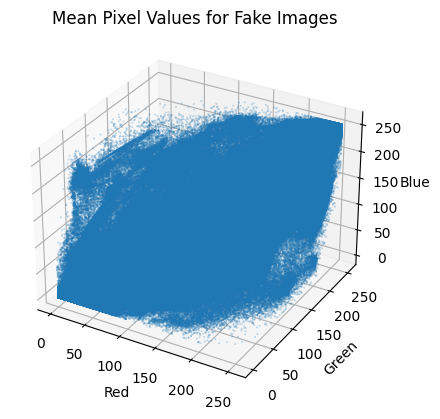

In [27]:
# plot a 3d plot of the mean pixel values for each channel
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_arr, g_arr, b_arr, alpha=0.4, s=0.1)
plt.title('Mean Pixel Values for Fake Images')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()


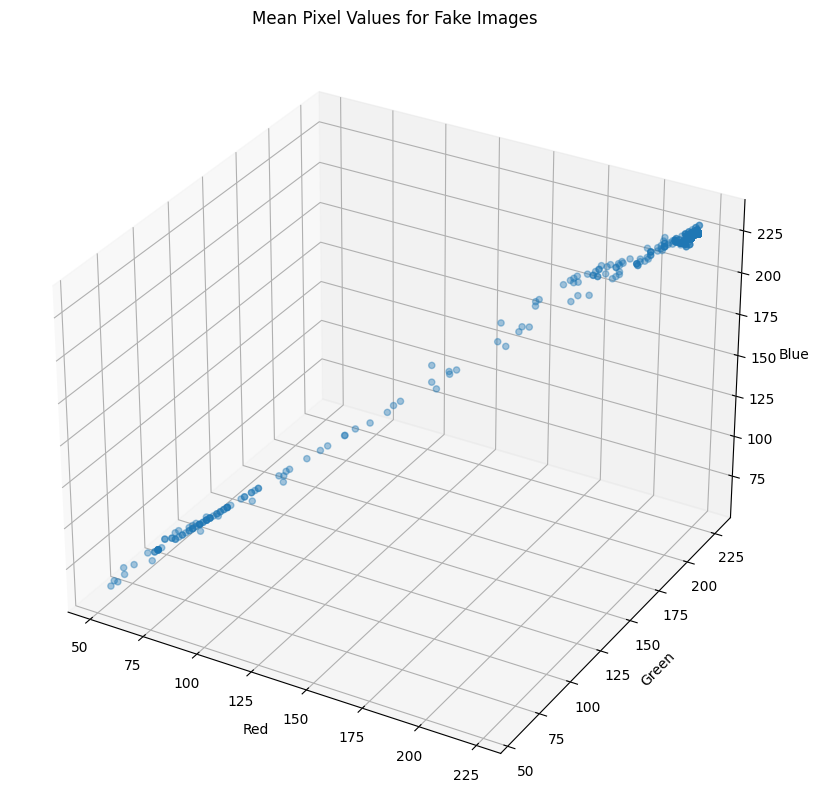

In [31]:
# get three channels subset of the images
r_arr_new = r_arr[:600]
g_arr_new = g_arr[:600]
b_arr_new = b_arr[:600]

# plot a 3d plot of the mean pixel values for each channel
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_arr_new, g_arr_new, b_arr_new, alpha=0.4)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
fig.set_size_inches(10, 10)
plt.title('Mean Pixel Values for Fake Images')
plt.show()


In [29]:
import altair as alt

df = pd.DataFrame({'r': r_arr_new, 'g': g_arr_new, 'b': b_arr_new})
alt.Chart(df).mark_circle().encode(
    x='r',
    y='g',
    color='b',
    size='count()'
).properties(
    width=500,
    height=500
).interactive()


/opt/miniconda3/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

> We can see that as the values of red goes up, the green channel tends to grow at the same time.

### Testing Dataset

> Fake Faces

In [32]:
tar_path_test = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_16.tar'
tar_path_test

'/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_16.tar'

In [35]:
with tarfile.open(tar_path_test, 'r') as tar:
    # Get a list of all members in the archive
    members = tar.getmembers()

    # Slice the list to get the first 100 members
    first_50_members = members[:51]

    # Extract the first 100 members to current directory
    tar.extractall(members=first_50_members)


In [37]:
jpg_files_test_fake = glob.glob(
    '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/1m_faces_16/*.jpg')


In [ ]:
for filename in jpg_files_test_fake:
    with Image.open(filename) as img:
        # resize to make it consistent
        img = img.resize((256, 256))
        # save the image back to disk
        img.save(filename)
        print(f"Image resolution for {filename}: {img.size}")


> The folder `1m_faces_16` contains 50 images. We will use this folder to test our model and the label should be fake faces (0).

```

> Real Faces

### Application Space Data

> All


In [ ]:
application_space_data_path = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/application_all_group/images/images'

jpg_files_application_all = glob.glob(
    '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/application_all_group/images/images/*.jpg')[:100]

jpg_files_application_all
# resize the images to 256x256 and save them back to disk
for filename in jpg_files_application_all:
    with Image.open(filename) as img:
        # resize to make it consistent
        img = img.resize((256, 256))
        # save the image back to disk
        img.save(filename)
        print(f"Image resolution for {filename}: {img.size}")

> Elderly Group

In [ ]:
application_space_data_elderly_path = '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/application_elderly'

jpg_files_application_elderly = glob.glob(
    '/Users/belladu/Desktop/IDS705 ML/IDS705_ML_Team9-main/application_elderly/*.jpg')[:100]

jpg_files_application_elderly
# resize the images to 256x256 and save them back to disk
for filename in jpg_files_application_elderly:
    with Image.open(filename) as img:
        # resize to make it consistent
        img = img.resize((256, 256))
        # save the image back to disk
        img.save(filename)
        print(f"Image resolution for {filename}: {img.size}")
        
